<a href="https://colab.research.google.com/github/lupantaleon/Entregas-/blob/main/Redes_Neuronales%2C_celsius_a_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf  
#libreria de inteligencia artificial hecha por Google
import numpy as np #para trabjar facilmente con  arreglos numericos 


CREAR CAPA DE ENTRADA Y SALIDA

In [2]:
celsius = np.array ([-40,-10, 0, 8, 15,22,38], dtype=float ) #Hago un array con los valores de entrada, le agrego los valores que usara para aprender.
#La función DType puede ser útil cuando necesitas asegurarte de que estás trabajando con el tipo de datos correcto en tu código.
fahrenheit = np.array([-40, 14,32,46,59,72,100], dtype=float) #Hago un array con los valores de salida

In [23]:
#capa = tf.keras.layers.Dense(units=1, input_shape = [1]) #aca nuestras capas estan flotando, debemos avisar como queremos que funcionen
#modelo =tf.keras.Sequential([capa ])

oculta1 = tf.keras.layers.Dense(units=3, input_shape= [1]) 
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])



COMPILAR NUESTRO MODELO, CON OPTIMIZAR Y PERDIDA 

In [24]:
modelo.compile( 
    optimizer =tf.keras.optimizers.Adam(0.1), #Adam es un optimizador que le permite a la red ajustar los pesos y los sesgos para que aprenda y no desaprenda. Osea que poco a poco vaya mejorando. Lataza de aprendizaje se coloca entre parentesis y le dice cuando ajustar
loss= 'mean_squared_error' #explica que una poca cantidad de  errores grandes es peor una gran cantidad de errores peqeños 

)#modelo echo para que aprenda mejor 

AHORA A ENTRENARLO

In [25]:
print ("comenzando el entrenamiento")
historial = modelo.fit (celsius,fahrenheit, epochs = 600, verbose =False)
print ("modelo entrenado")

comenzando el entrenamiento
modelo entrenado


Veamos que perdida tenemos

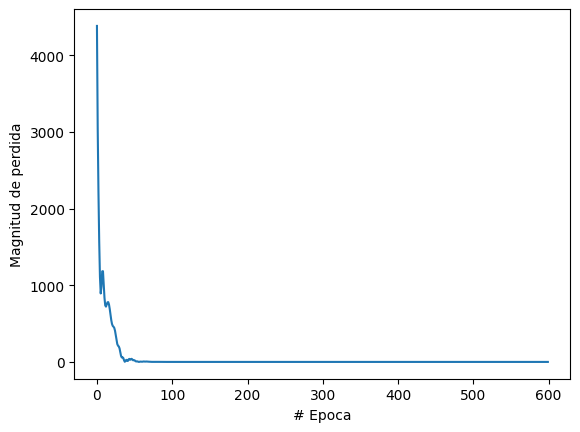

In [26]:
import matplotlib.pyplot as plt 
plt.xlabel ("# Epoca")
plt.ylabel ("Magnitud de perdida")
plt.plot(historial.history ["loss"])

Hacer una predicción

In [27]:
print("hagamos una predicción")
resultado = modelo.predict([100.0])
print( "el resultado es " + str(resultado) + "fahrenheit")

hagamos una predicción
1/1 [==============================] - 0s 122ms/step
el resultado es [[211.74745]]fahrenheit


In [28]:
print("vaiables internas del modelo")
print(oculta1.get_weights ())
print(oculta2.get_weights ())
print(salida.get_weights ())

vaiables internas del modelo
[array([[-0.8952729 , -0.3633737 , -0.13538796]], dtype=float32), array([-3.630887 ,  2.0532584,  2.9183688], dtype=float32)]
[array([[-0.06529599,  0.01771223,  1.3882256 ],
       [ 1.3947657 ,  0.25578287, -0.6793946 ],
       [ 0.2903361 ,  0.2264039 , -0.96694297]], dtype=float32), array([-1.4421128, -0.9361487, -3.765043 ], dtype=float32)]
[array([[ 0.21377227],
       [-0.33254942],
       [-2.1453273 ]], dtype=float32), array([3.5411537], dtype=float32)]
